## Movie Rating Prediction Using Python

---------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, r2_score,mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [3]:
df= pd.read_csv(r"C:\Users\Prem\Downloads\IMDbMoviesIndia.csv", encoding='latin1')

In [4]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
df.shape

(15509, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


### Discriptive statistical analysis

In [7]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [8]:
df.describe(include="all")

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,15509,13838,Anjaam,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,14981,102,(2019),410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,7240,182,120 min,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre,13632,485,Drama,2780,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,7919.0,NaN,NaN,NaN,5.841621,1.381777,1.1,4.9,6.0,6.8,10.0
Votes,7920,2034,8,227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Director,14984,5938,Jayant Desai,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Actor 1,13892,4718,Ashok Kumar,158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Actor 2,13125,4891,Rekha,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Actor 3,12365,4820,Pran,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

In [10]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [11]:
df.isnull().sum().sort_values(ascending=False)

Duration    8269
Rating      7590
Votes       7589
Actor 3     3144
Actor 2     2384
Genre       1877
Actor 1     1617
Year         528
Director     525
Name           0
dtype: int64

In [12]:
(round(df.isnull().sum()/df.isnull().count(),4)*100).sort_values(ascending=False)

Duration    53.32
Rating      48.94
Votes       48.93
Actor 3     20.27
Actor 2     15.37
Genre       12.10
Actor 1     10.43
Year         3.40
Director     3.39
Name         0.00
dtype: float64

In [13]:
df.dropna(subset=["Rating","Actor 1", "Actor 2","Actor 3", "Director","Genre"], inplace=True)

In [14]:
df.isnull().sum()

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [15]:
(round(df.isnull().sum()/df.isnull().count(),4)*100).sort_values(ascending=False)

Duration    25.13
Name         0.00
Year         0.00
Genre        0.00
Rating       0.00
Votes        0.00
Director     0.00
Actor 1      0.00
Actor 2      0.00
Actor 3      0.00
dtype: float64

In [16]:
df['Duration'] = pd.to_numeric(df['Duration'].str.strip(' min'))

In [17]:
df['Duration'].isnull().sum()

1899

In [18]:
df.fillna(df['Duration'].mean(), inplace=True)
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [19]:
df.shape

(7558, 10)

In [20]:
df.dtypes

Name         object
Year         object
Duration    float64
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

### Changing the datatype

In [21]:
df['Duration']= df['Duration'].astype("int")

In [22]:
df['Year'] = df['Year'].str.replace(r'\D', '', regex=True).astype('int')

In [23]:
df['Votes']= df['Votes'].str.replace(',','')

In [24]:
df['Votes']= df['Votes'].astype('int')

In [25]:
df.dtypes

Name         object
Year          int32
Duration      int32
Genre        object
Rating      float64
Votes         int32
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [26]:
df.Year.unique()

array([2019, 1997, 2005, 2012, 2014, 2004, 2016, 1991, 2018, 2010, 1958,
       2021, 2017, 2009, 1993, 2002, 1946, 2008, 1994, 2007, 2013, 2003,
       1998, 1979, 1974, 2015, 2006, 1981, 2020, 1985, 2011, 1988, 1995,
       1987, 1999, 1973, 1968, 1953, 1986, 1982, 1977, 1950, 1969, 1948,
       1967, 1970, 1990, 1989, 1947, 2001, 2000, 1971, 1978, 1944, 1963,
       1992, 1976, 1984, 1975, 1980, 1966, 1972, 1956, 1960, 1964, 1952,
       1959, 1951, 1954, 1962, 1961, 1957, 1965, 1996, 1933, 1955, 1983,
       1936, 1949, 1940, 1945, 1938, 1941, 1942, 1932, 1935, 1937, 1931,
       1943, 1917, 1939, 1934])

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7558.0,1993.421011,20.004711,1917.0,1980.0,1996.0,2011.0,2021.0
Duration,7558.0,133.328791,21.909669,21.0,125.0,133.0,144.0,321.0
Rating,7558.0,5.811127,1.368255,1.1,4.9,6.0,6.8,10.0
Votes,7558.0,2029.123842,11868.695754,5.0,18.0,61.0,456.0,591417.0


### Data Visualization

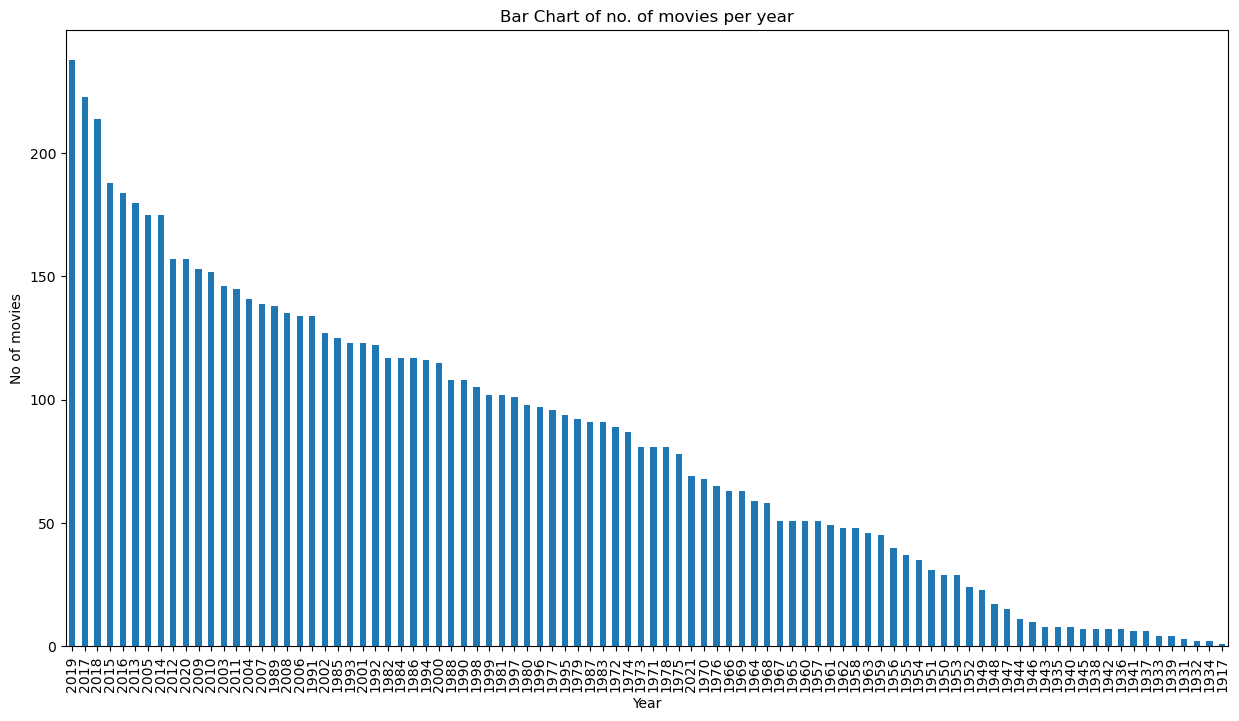

In [28]:
plt.figure(figsize=(15,8))
df['Year'].value_counts().plot(kind='bar')
plt.title('Bar Chart of no. of movies per year')
plt.xlabel('Year')
plt.ylabel('No of movies')
plt.show()

## Visualization

<AxesSubplot:xlabel='Duration', ylabel='Count'>

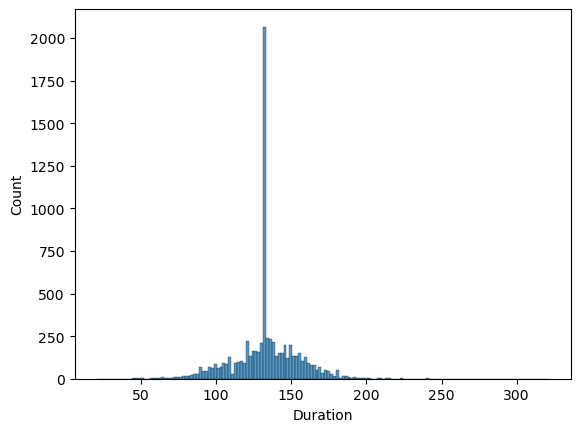

In [29]:
sns.histplot(df['Duration'])

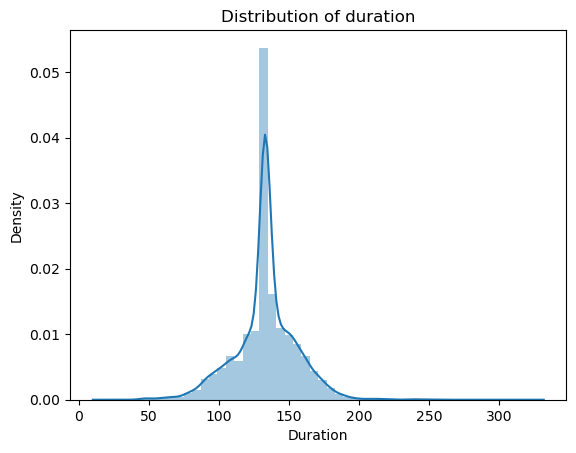

In [30]:
sns.distplot(df['Duration'])
plt.title('Distribution of duration')
plt.show()

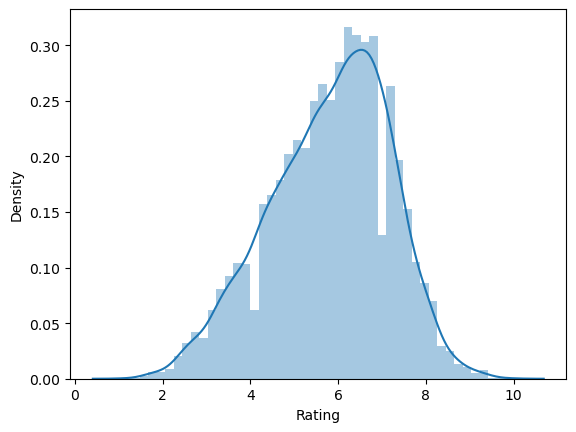

In [31]:
sns.distplot(df['Rating'])
plt.show()

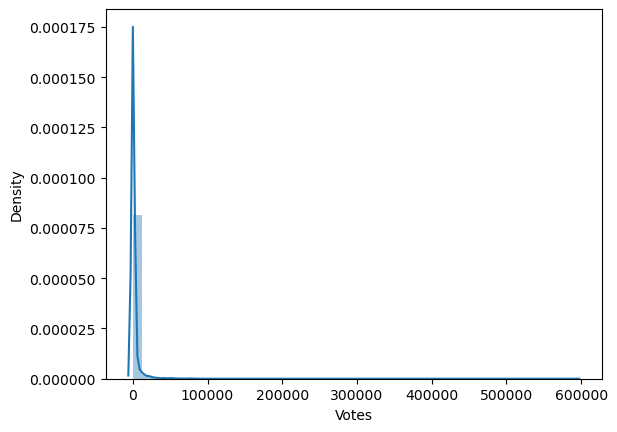

In [32]:
sns.distplot(df['Votes'])
plt.show()

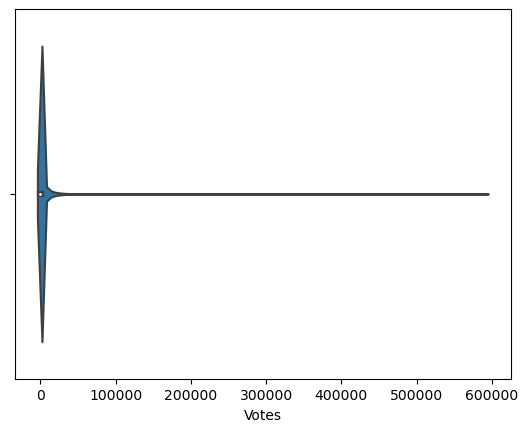

In [33]:
sns.violinplot(df['Votes'])
plt.show()

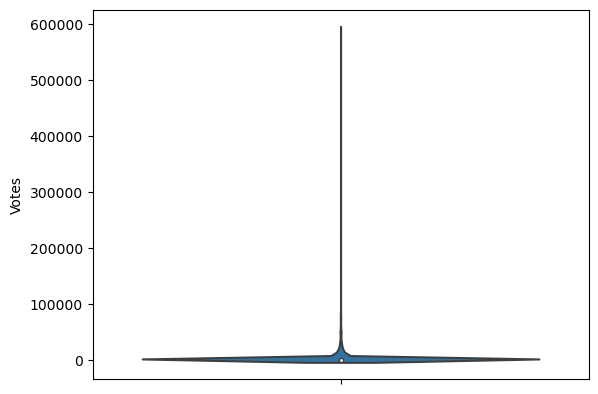

In [34]:
sns.violinplot(y=df['Votes'])
plt.show()

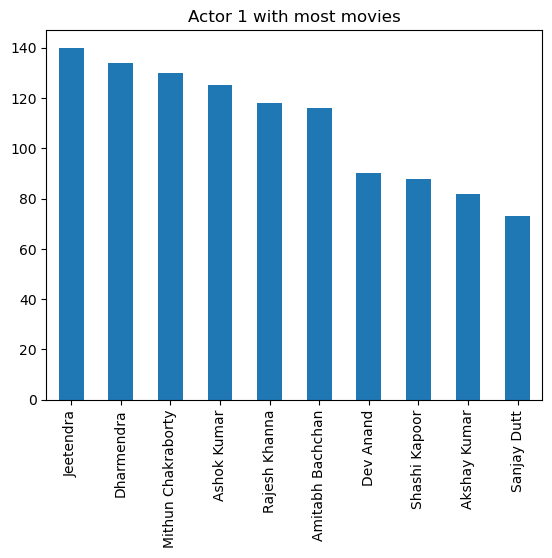

In [35]:
df['Actor 1'].value_counts().head(10).plot(kind='bar')
plt.title('Actor 1 with most movies')
plt.show()

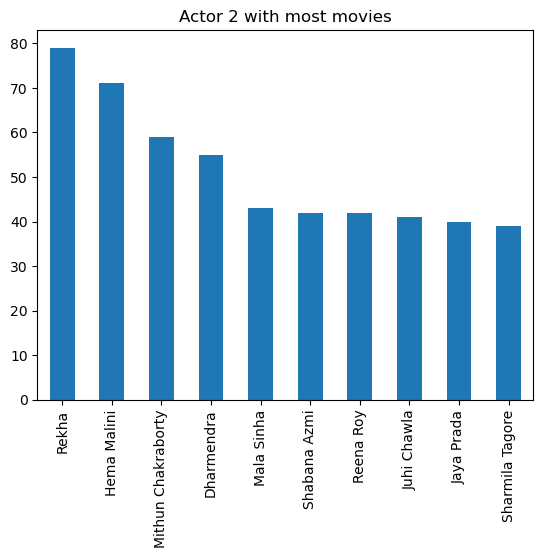

In [36]:
df['Actor 2'].value_counts().head(10).plot(kind='bar')
plt.title('Actor 2 with most movies')
plt.show()

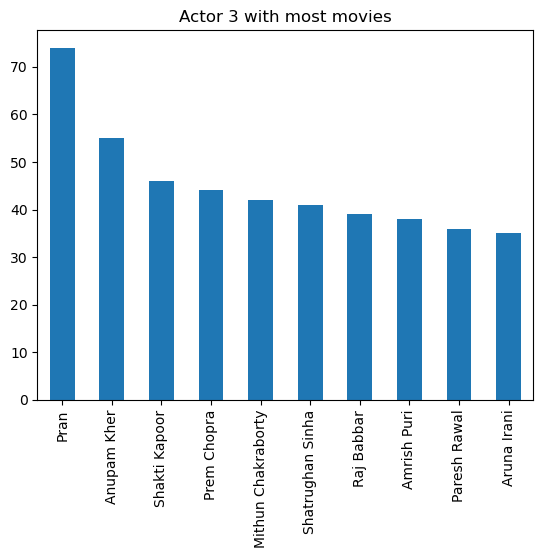

In [37]:
df['Actor 3'].value_counts().head(10).plot(kind='bar')
plt.title('Actor 3 with most movies')
plt.show()

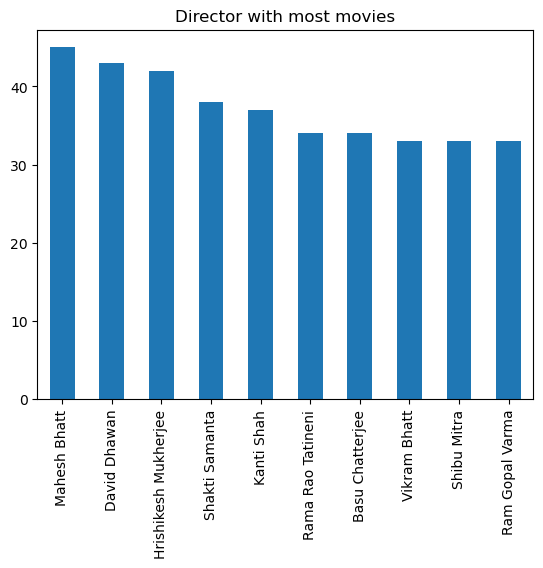

In [38]:
df['Director'].value_counts().head(10).plot(kind='bar')
plt.title('Director with most movies')
plt.show()

<AxesSubplot:ylabel='Rating'>

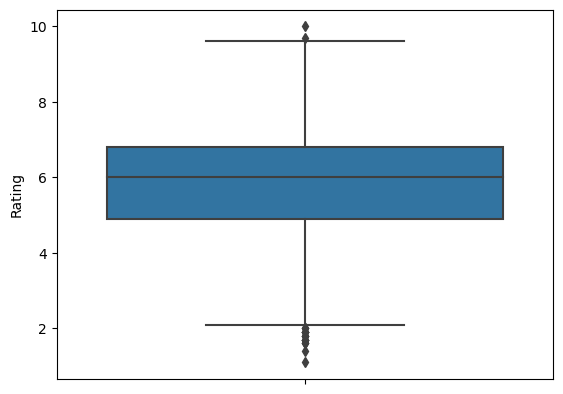

In [39]:
sns.boxplot(y=df['Rating'])

In [40]:
df.corr()

,Year,Duration,Rating,Votes
Year,1.000000,-0.277581,-0.194990,0.134223
Duration,-0.277581,1.000000,0.002565,0.097999
Rating,-0.194990,0.002565,1.000000,0.134655
Votes,0.134223,0.097999,0.134655,1.000000


<AxesSubplot:>

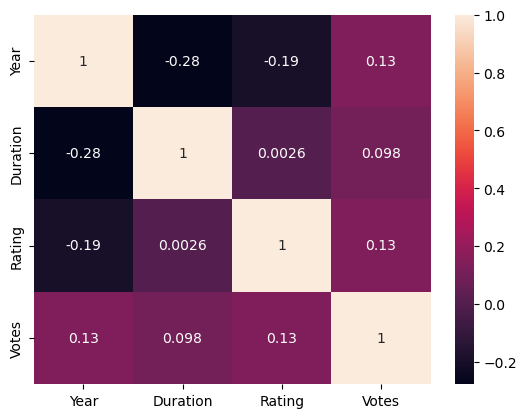

In [41]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Rating', ylabel='Genre'>

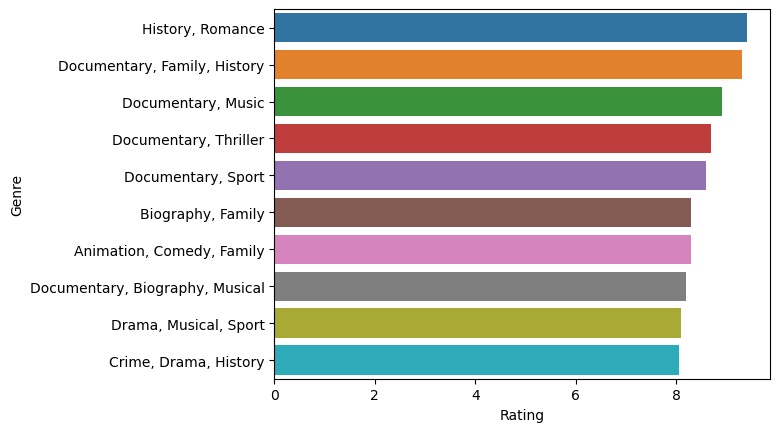

In [42]:
genre_rate= df.groupby('Genre').agg({'Rating':'mean'}).sort_values(by='Rating',ascending=False).reset_index().head(10)
sns.barplot(data=genre_rate, x='Rating', y='Genre')

<AxesSubplot:xlabel='Rating', ylabel='Director'>

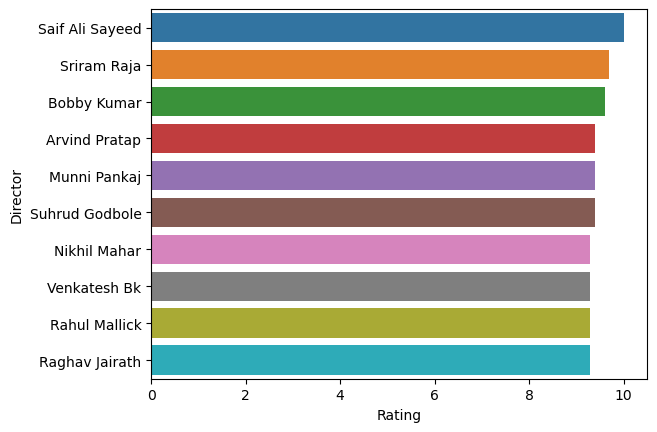

In [43]:
genre_rate= df.groupby('Director').agg({'Rating':'mean'}).sort_values(by='Rating',ascending=False).reset_index().head(10)
sns.barplot(data=genre_rate, x='Rating', y='Director')

<AxesSubplot:xlabel='Rating', ylabel='Actor 1'>

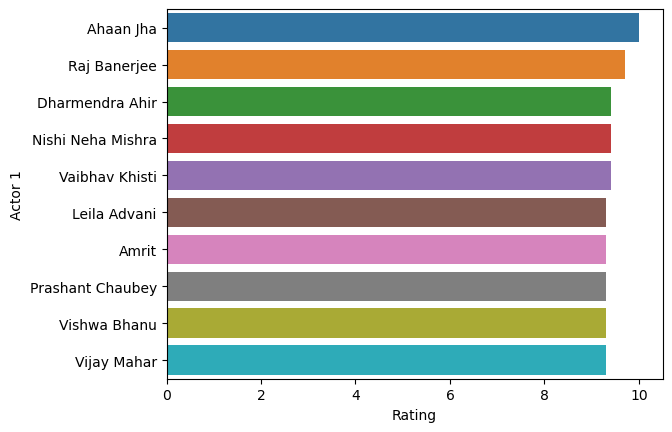

In [44]:
genre_rate= df.groupby('Actor 1').agg({'Rating':'mean'}).sort_values(by='Rating',ascending=False).reset_index().head(10)
sns.barplot(data=genre_rate, x='Rating', y='Actor 1')

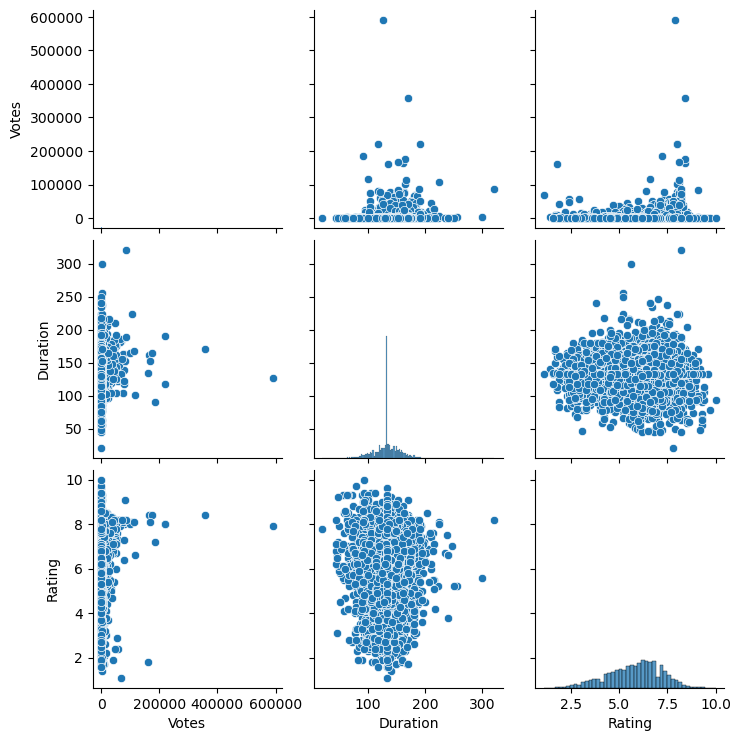

In [45]:
sns.pairplot(df[['Votes','Duration','Rating']])

## Target Encoding

In [46]:
genre_counts= df['Genre'].value_counts()
df['Genre_encoded']= df['Genre'].map(genre_counts)

In [47]:
Genre_mean_rating= df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating']= Genre_mean_rating

In [48]:
actor1_mean_rating= df.groupby('Actor 1')['Rating'].transform('mean')
df['actor1_encoded_rating']= actor1_mean_rating

In [49]:
Director_mean_rating= df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded_rating']= Director_mean_rating

<AxesSubplot:ylabel='Frequency'>

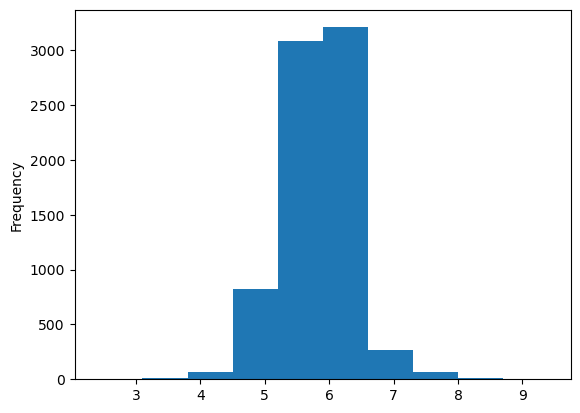

In [50]:
df['Genre_mean_rating'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

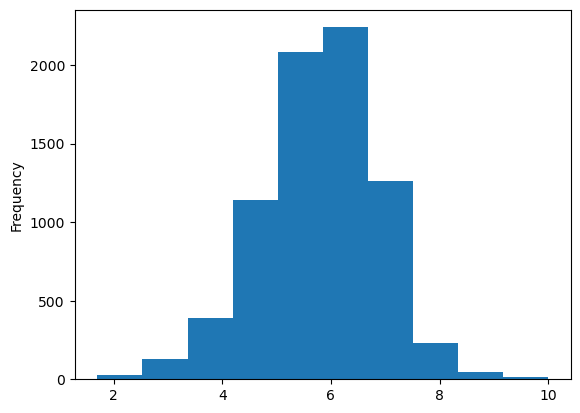

In [51]:
df['Director_encoded_rating'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

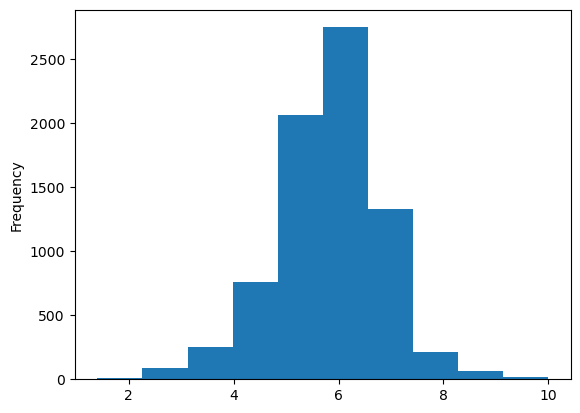

In [52]:
df['actor1_encoded_rating'].plot(kind='hist')

In [53]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'Genre_encoded', 'Genre_mean_rating',
       'actor1_encoded_rating', 'Director_encoded_rating'],
      dtype='object')

## Train test split

In [54]:
x= df[['actor1_encoded_rating','Director_encoded_rating','Genre_mean_rating','Year','Votes','Duration']]
y=df['Rating']

In [55]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.20, random_state=42)

In [56]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6046, 6), (1512, 6), (6046,), (1512,))

## Model Building

In [57]:
lr=LinearRegression()

In [58]:
lr.fit(x_train,y_train)

LinearRegression()

In [59]:
lr_pred = lr.predict(x_test)

In [60]:
lr_pred

array([6.83238473, 5.09911089, 6.30768715, ..., 6.99855214, 7.34214855,
       5.39422804])

In [61]:
lr.score(x_train,y_train)

0.7025855894441657

In [62]:
r2_score(y_test, lr_pred)

0.7030502878047669

In [63]:
mean_absolute_error(y_test,lr_pred)

0.5466060640290045

In [64]:
mean_squared_error(y_test,lr_pred)

0.5501995294291575

In [65]:
rmse=np.sqrt(mean_squared_error(y_test,lr_pred))
rmse

0.7417543592249105